In [172]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,r2_score,plot_roc_curve
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [173]:
data=pd.read_csv(r'C:\Data Scientist Internship Projects\abalone.csv')

In [174]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [175]:
data.shape

(4177, 9)

In [176]:
data.isna().sum()
## There is not null data

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [178]:
data.describe()
## Data is normally distributed because mean is almost near to 50% Median

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<AxesSubplot:xlabel='Sex', ylabel='count'>

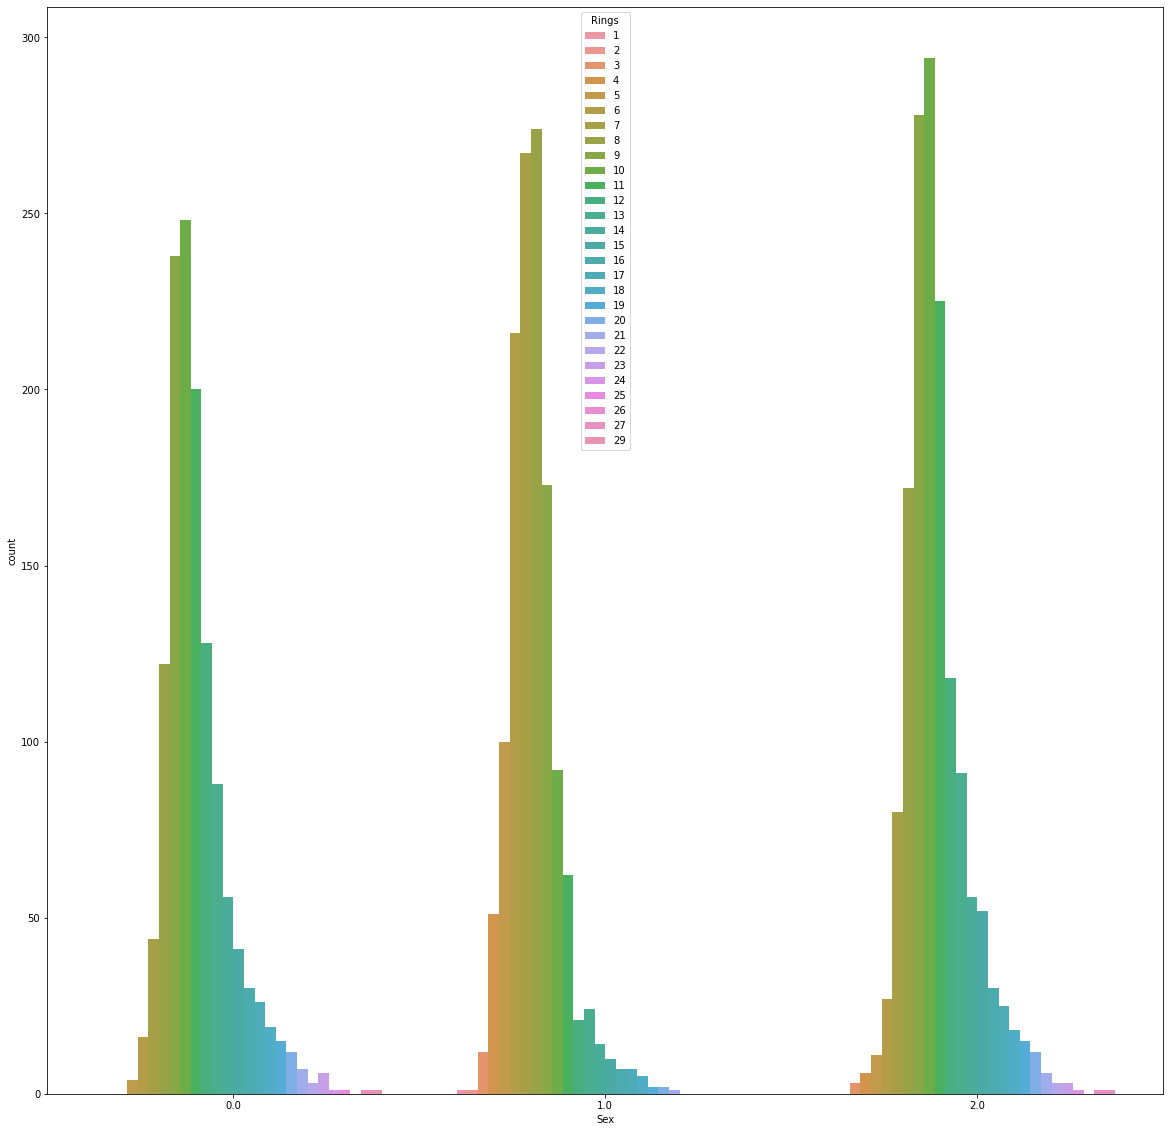

In [218]:
ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='Sex',hue='Rings',data=data)
## Almost Equal for All Gender Types

In [217]:
pd.crosstab(data['Sex'],data['Rings'], margins=True)
## Sex is object type data

Rings,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,29,All
Sex,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,4,16,44,122,238,248,...,12,7,3,6,1,1,0,1,1,1307
1.0,1,1,12,51,100,216,267,274,173,92,...,2,1,0,0,0,0,0,0,0,1342
2.0,0,0,3,6,11,27,80,172,278,294,...,12,6,3,3,1,0,1,1,0,1528
All,1,1,15,57,115,259,391,568,689,634,...,26,14,6,9,2,1,1,2,1,4177


In [216]:
data.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [219]:
## Transform Object data (Sex)
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [220]:
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [221]:
data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


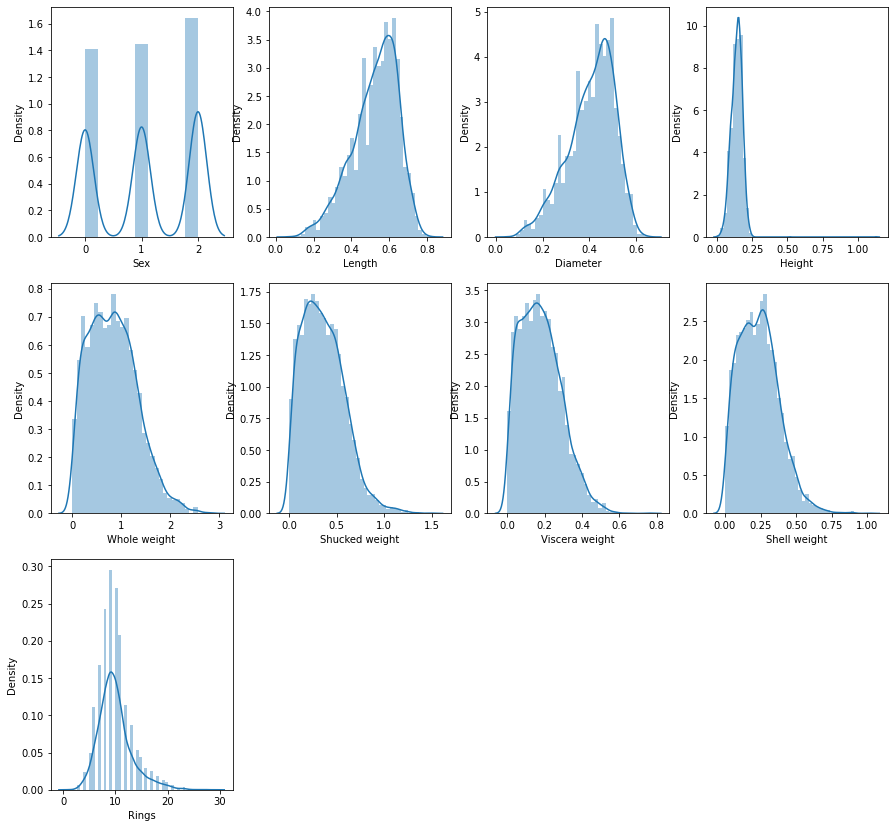

In [185]:
## for showing the skewness
plt.figure(figsize=(15,50))
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

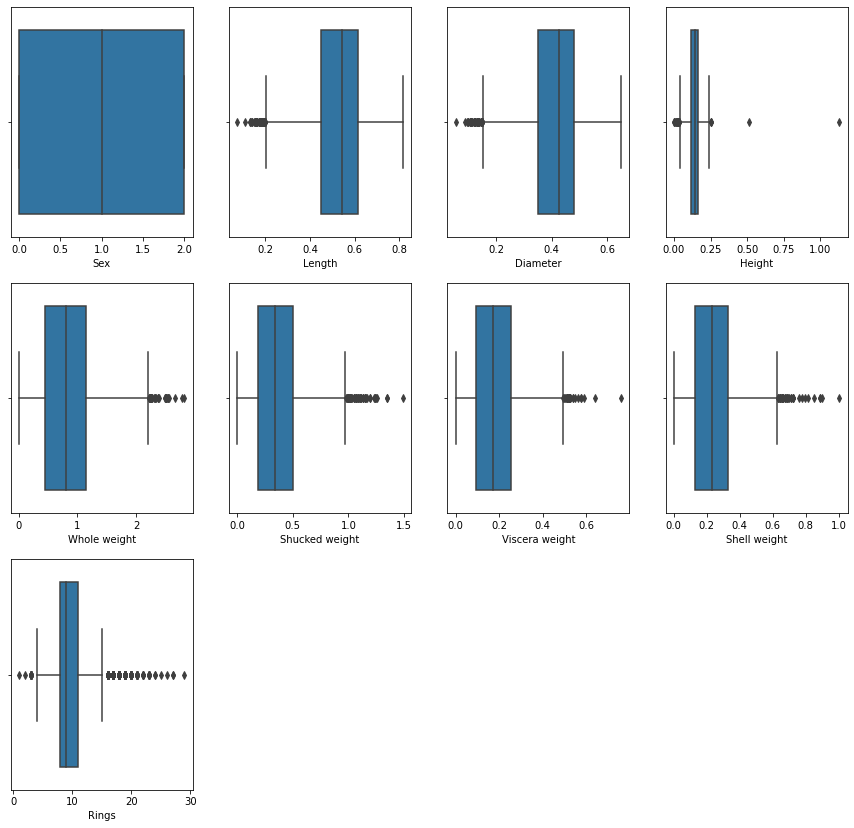

In [186]:
## for Detecting the Outliers
plt.figure(figsize=(15,50))
graph=1
for column in data:
    if graph<=9:
        ax=plt.subplot(10,4,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

## Outliers present in Length, Diameter, Height, Weight , Rings etc

In [187]:
## By using Zscore to remove outliers
from scipy.stats import zscore
z_score= zscore(data[['Length','Rings','Shucked weight','Viscera weight','Shell weight','Whole weight','Diameter','Height']])
abs_z_score= np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
datanew=data[filtering_entry]

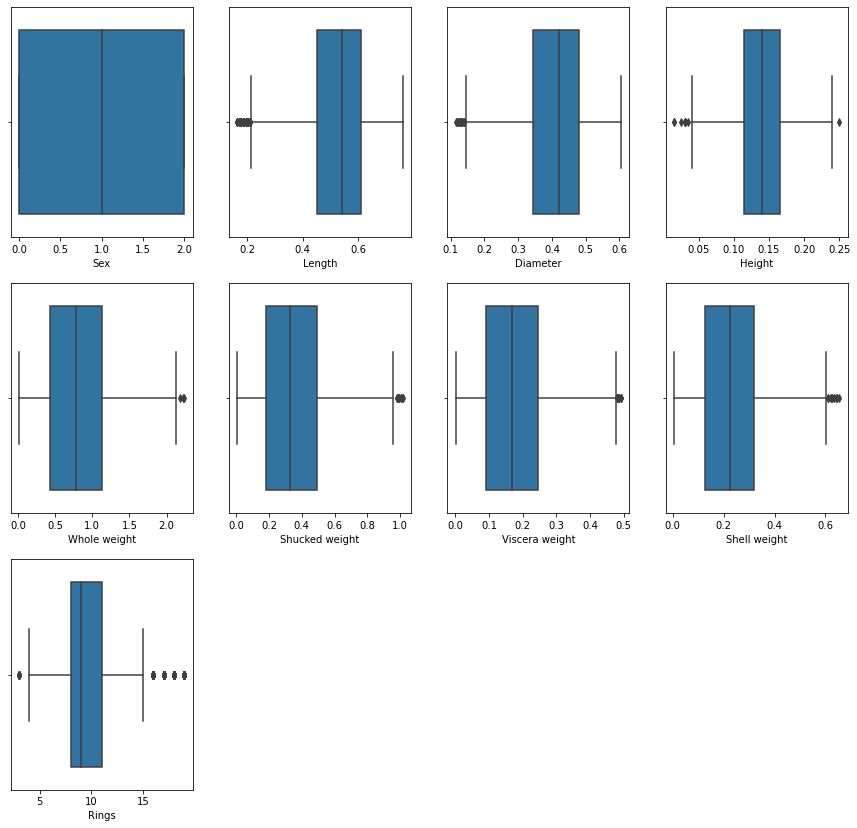

In [188]:
# Again After applying the ztest again check the outliers
## for Detecting the Outliers
plt.figure(figsize=(15,50))
graph=1
for column in datanew:
    if graph<=9:
        ax=plt.subplot(10,4,graph)
        sns.boxplot(datanew[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [189]:
## for Rings,Height, Length,Diameter I am using Outlier Deection formula
#Higher Side =Q3+(1.5*IQR)
#Lower Side=Q1-(1.5*IQR)

In [190]:
## find the IQR 
q1= datanew.quantile(0.25)
q3=datanew.quantile(0.75)
#IQR
iqr= q3-q1

In [191]:
Rgs=(q3.Rings+(1.5*iqr.Rings))
Rgs

15.5

In [192]:
index=np.where(datanew['Rings']>Rgs)
index

(array([   6,    8,   31,   32,   35,   79,  124,  125,  137,  152,  184,
         222,  238,  252,  265,  268,  271,  288,  292,  310,  326,  328,
         329,  330,  332,  334,  338,  339,  340,  341,  375,  384,  392,
         393,  394,  395,  396,  405,  410,  412,  413,  414,  415,  431,
         437,  439,  440,  441,  443,  454,  457,  463,  468,  507,  527,
         529,  535,  538,  548,  549,  555,  556,  569,  577,  579,  597,
         611,  612,  613,  615,  619,  626,  627,  634,  638,  648,  672,
         681,  690,  691,  692,  705,  706,  713,  825, 1871, 2010, 2045,
        2058, 2062, 2066, 2084, 2103, 2104, 2109, 2110, 2112, 2120, 2132,
        2136, 2161, 2169, 2174, 2203, 2209, 2211, 2220, 2230, 2232, 2233,
        2238, 2241, 2244, 2245, 2246, 2250, 2254, 2255, 2258, 2273, 2280,
        2287, 2289, 2292, 2306, 2308, 2321, 2323, 2324, 2327, 2351, 2355,
        2363, 2386, 3037, 3064, 3071, 3072, 3085, 3088, 3091, 3093, 3106,
        3113, 3128, 3132, 3140, 3143, 

In [193]:
datanew=datanew.drop(datanew.index[index])

In [194]:
datanew.shape

(3841, 9)

In [195]:
datanew.reset_index()

,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
3836,4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
3837,4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
3838,4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
3839,4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


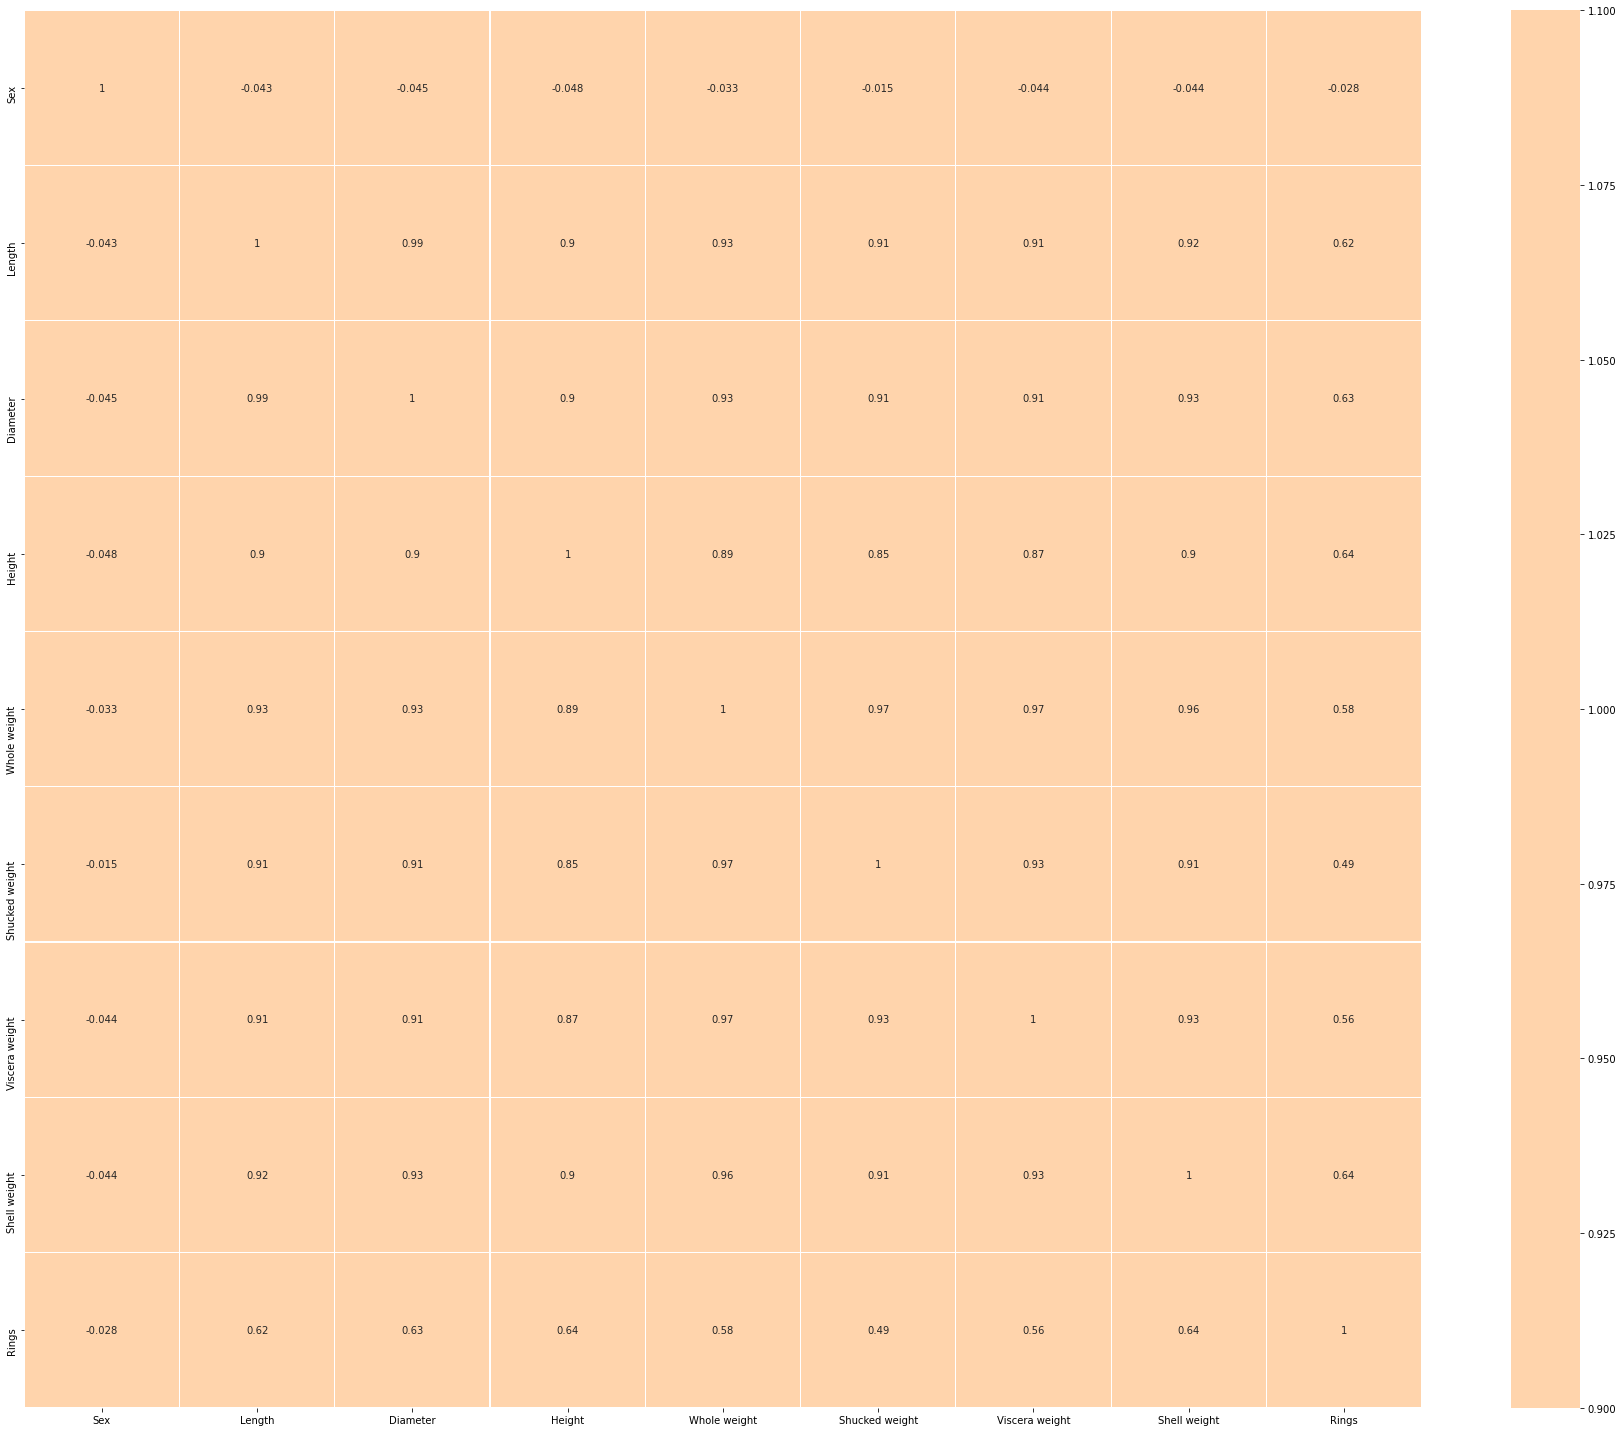

In [196]:
datanew_corr=datanew.corr()
plt.figure(figsize=(25,20))
sns.heatmap(datanew_corr,vmin=1,vmax=1,annot=True,square=True,center=0,fmt='0.2g',linewidths=.1)
plt.tight_layout()
## Correlation is very high between (Length and Diameter), (Total Weight and Other Weights)

In [222]:
## Separate Feature Variable and Target Variable
x=datanew.drop('Rings',axis=1)
y=datanew['Rings']

In [225]:
## To normalise the "Skewne"
scalar=StandardScaler()
X=scalar.fit_transform(x)
X

array([[ 1.16512097, -0.53756485, -0.38784164, ..., -0.58213997,
        -0.69562492, -0.5947658 ],
       [ 1.16512097, -1.43669431, -1.42512864, ..., -1.18348996,
        -1.20420861, -1.23251447],
       [-1.29989122,  0.10467048,  0.18266621, ..., -0.42819438,
        -0.30328892, -0.1164543 ],
       ...,
       [ 1.16512097,  0.70409012,  0.75317406, ...,  0.86591078,
         1.11105811,  0.66478782],
       [-1.29989122,  0.91816857,  0.85690276, ...,  0.89237018,
         0.85434444,  0.56912552],
       [ 1.16512097,  1.64603527,  1.58300366, ...,  2.88644673,
         1.97322857,  2.15552533]])

In [226]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']=x.columns
vif
## High Correlation in many dependent variables

,vif,features
0,1.009456,Sex
1,39.864511,Length
2,41.319459,Diameter
3,6.653929,Height
4,112.938191,Whole weight
5,30.775318,Shucked weight
6,17.781089,Viscera weight
7,23.906490,Shell weight


In [200]:
## Drop Some Features to remove multicollinearity
x1=x.drop(['Shucked weight','Viscera weight','Shell weight','Length'],axis=1)

In [201]:
scalar=StandardScaler()
X1=scalar.fit_transform(x1)
X1

array([[ 1.16512097, -0.38784164, -1.13155717, -0.60167837],
       [ 1.16512097, -1.42512864, -1.26791631, -1.23652234],
       [-1.29989122,  0.18266621, -0.04068408, -0.24299702],
       ...,
       [ 1.16512097,  0.75317406,  1.86834382,  0.85505199],
       [-1.29989122,  0.85690276,  0.36839332,  0.67571132],
       [ 1.16512097,  1.58300366,  1.59562555,  2.5549375 ]])

In [202]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X1,i) for i in range(X1.shape[1])]
vif['features']=x1.columns
vif

,vif,features
0,1.003318,Sex
1,9.686749,Diameter
2,6.136008,Height
3,8.744336,Whole weight


In [227]:
x_train,x_test,y_train,y_test=train_test_split(X1,y,test_size=0.20,random_state=56)

In [229]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
lr=LinearRegression()
dt= DecisionTreeClassifier()
rf= RandomForestClassifier()
kn=KNeighborsClassifier()

In [230]:
## Training with These Classifiers
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
lr.fit(x_train,y_train)
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [231]:
## Check The Scores
dt.score(x_test,y_test)

0.1976592977893368

In [232]:
rf.score(x_test,y_test)

0.2340702210663199

In [233]:
lr.score(x_test,y_test)

0.41211240589738785

In [234]:
kn.score(x_test,y_test)

0.22886866059817945

In [243]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
## Cross Validation to check overfitting
## There is no overfitting because now score is same
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(),X1,y,cv=5)
cross_val_score(knn,X1,y,cv=5).mean()

0.2252126679670568

In [235]:
from sklearn.ensemble import AdaBoostClassifier

In [236]:
ada= AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [237]:
y_pred=ada.predict(x_test)

In [239]:
print(accuracy_score(y_test,y_pred))

0.15604681404421328


In [240]:
## To Save the Model
import pickle
filename= 'churn.pickle'
pickle.dump(rf,open(filename,'wb'))

In [241]:
loaded_model=pickle.load(open('churn.pickle','rb'))
result=loaded_model.score(x_test,y_test)
result

0.2340702210663199

In [ ]:
##Linear Regression Model is best score is 0.41